In [1]:
from coc131_cw import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
coc = COC131()

#### **Question 1 Check**

In [2]:
res1, res2 = coc.q1('AnnualCrop_1.jpg')
print(f"res1: {res1}") 
print(f"res2: {res2}")
print(f"res1 shape: {res1.shape}")


res1: [149. 121. 120. ... 106.  94. 104.]
res2: AnnualCrop
res1 shape: (3072,)


#### **Question 2 Check**

In [3]:
inp = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
standardisedData, res2 = coc.q2(inp)

print("Standardized Data:\n", standardisedData)
print("\nScaler Object:\n", res2)

Standardized Data:
 [[-3.06186218 -3.06186218 -3.06186218]
 [ 0.          0.          0.        ]
 [ 3.06186218  3.06186218  3.06186218]]

Scaler Object:
 StandardScaler()


#### **Question 3 Check**

In [4]:
best_model, best_loss_curve, best_train_curve, best_test_curve = coc.q3(test_size=0.2)

print("Final Training Accuracy:", best_train_curve[-1])
print("Final Testing Accuracy:", best_test_curve[-1])
print("Loss Curve:", best_loss_curve)


Final Training Accuracy: 0.5752777777777778
Final Testing Accuracy: 0.552037037037037
Loss Curve: [1.84542083 1.50752659 1.38290767 1.30747355 1.25182578]


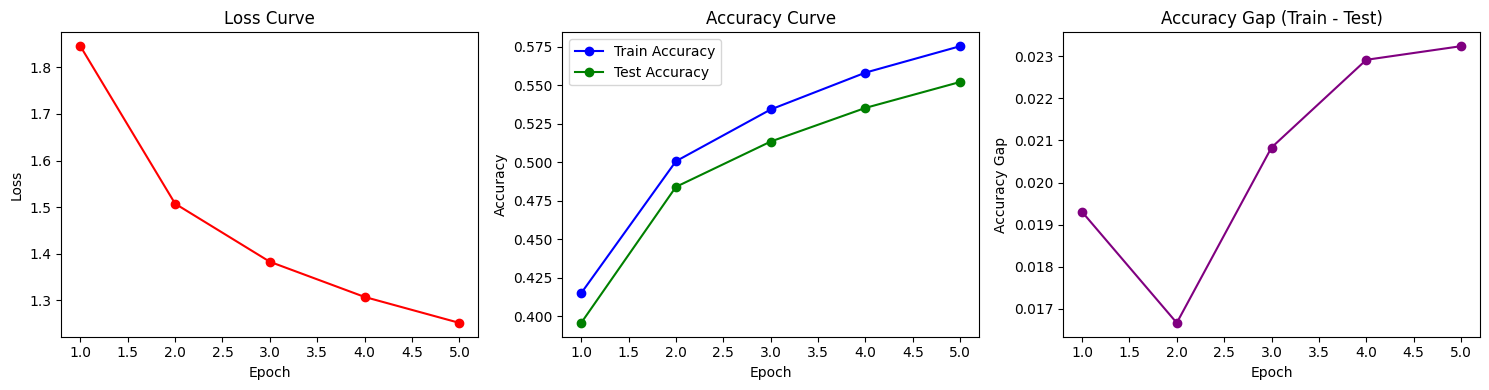

In [5]:
# Visualisation to show the change of acuuracy on training and testing (seperately) over each epoch
import matplotlib.pyplot as plt

def plot_hyperparam_results(loss_curve, train_curve, test_curve):
    epochs = range(1, len(loss_curve) + 1)

    plt.figure(figsize=(15, 4))

    # Loss Curve
    plt.subplot(1, 3, 1)
    plt.plot(epochs, loss_curve, marker='o', color='red')
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    # Accuracy Curve
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_curve, marker='o', label='Train Accuracy', color='blue')
    plt.plot(epochs, test_curve, marker='o', label='Test Accuracy', color='green')
    plt.title("Accuracy Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Accuracy Gap (Train - Test)
    plt.subplot(1, 3, 3)
    acc_gap = train_curve - test_curve
    plt.plot(epochs, acc_gap, marker='o', color='purple')
    plt.title("Accuracy Gap (Train - Test)")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy Gap")

    plt.tight_layout()
    plt.show()

# Usage:
plot_hyperparam_results(best_loss_curve, best_train_curve, best_test_curve)

#### **Question 4 Check**

In [6]:
# Call the q4 method to get results for different alpha values
results = coc.q4(test_size=0.2)

# Debugging step: Print out the type and structure of results
print(f"Results: {results}")

# Check if the results are a dictionary
if isinstance(results, dict):
    # Iterate over all alpha values and print their corresponding metrics
    for alpha, metrics in results.items():
        print(f"Alpha: {alpha}")
        print(f"Loss Curve: {metrics['loss_curve']}")
        print(f"Training Accuracy Curve: {metrics['train_acc_curve']}")
        print(f"Testing Accuracy Curve: {metrics['test_acc_curve']}")
        print("-" * 40)
else:
    print("Error: The results returned from q4 are not in the expected dictionary format.")


Results: {0.0001: {'loss_curve': array([1.84542083, 1.50752659, 1.38290767, 1.30747355, 1.25182578]), 'train_acc_curve': array([0.41486111, 0.50055556, 0.53416667, 0.55810185, 0.57527778]), 'test_acc_curve': array([0.39555556, 0.48388889, 0.51333333, 0.53518519, 0.55203704])}, 0.001: {'loss_curve': array([1.8462041 , 1.50828018, 1.38364344, 1.3079815 , 1.2527186 ]), 'train_acc_curve': array([0.41472222, 0.50069444, 0.53462963, 0.55907407, 0.57564815]), 'test_acc_curve': array([0.39518519, 0.48407407, 0.51537037, 0.53425926, 0.55203704])}, 0.01: {'loss_curve': array([1.85408261, 1.51557853, 1.39145274, 1.31631368, 1.26115171]), 'train_acc_curve': array([0.41486111, 0.50027778, 0.53388889, 0.55787037, 0.57462963]), 'test_acc_curve': array([0.39666667, 0.4837037 , 0.51574074, 0.53555556, 0.54944444])}, 0.1: {'loss_curve': array([1.9324258 , 1.59441552, 1.47042117, 1.39527665, 1.34020126]), 'train_acc_curve': array([0.41597222, 0.50087963, 0.53388889, 0.55689815, 0.5737963 ]), 'test_acc_cu

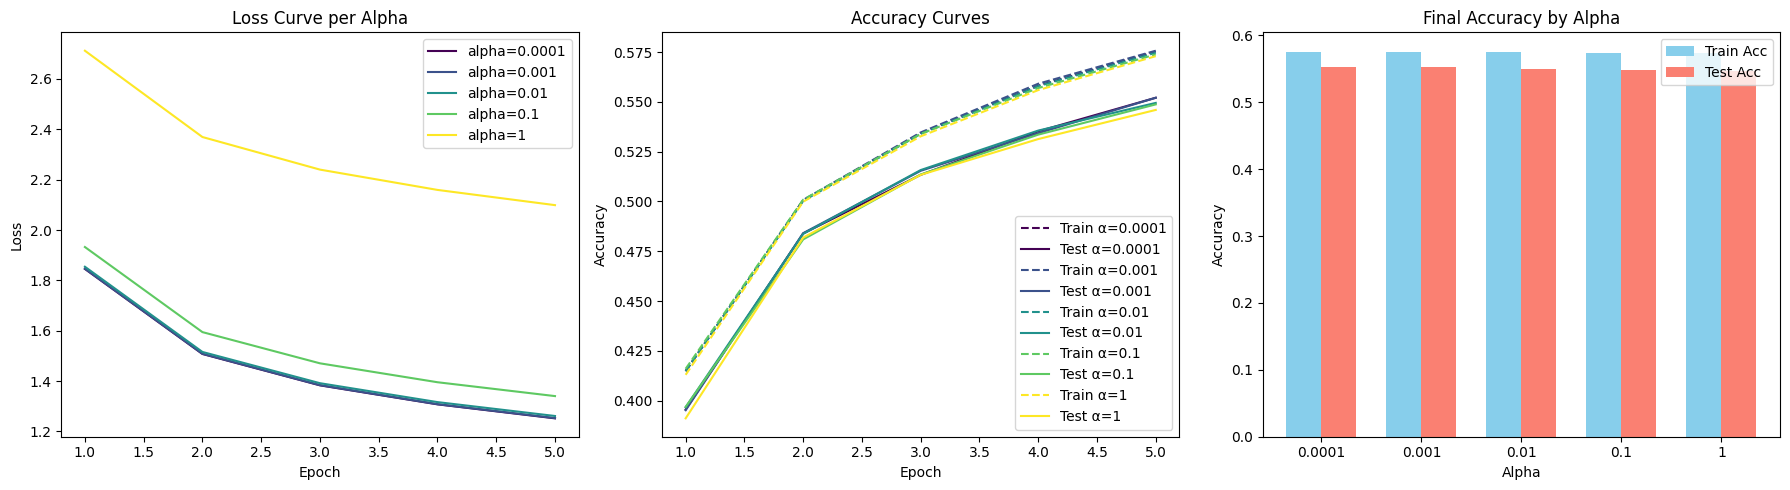

In [11]:
# visualisations to show the training and testing accuracies (seperately over time) and the effect of changing alpha on both
import matplotlib.pyplot as plt

def plot_alpha_impact(results):
    alphas = sorted(results.keys())
    epochs = range(1, len(next(iter(results.values()))['loss_curve']) + 1)

    # Setup for subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    colors = plt.cm.viridis(np.linspace(0, 1, len(alphas)))

    # 1. Loss Curves
    for i, alpha in enumerate(alphas):
        axes[0].plot(epochs, results[alpha]['loss_curve'], label=f'alpha={alpha}', color=colors[i])
    axes[0].set_title("Loss Curve per Alpha")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Loss")
    axes[0].legend()

    # 2. Accuracy Curves
    for i, alpha in enumerate(alphas):
        axes[1].plot(epochs, results[alpha]['train_acc_curve'], linestyle='--', color=colors[i], label=f'Train α={alpha}')
        axes[1].plot(epochs, results[alpha]['test_acc_curve'], linestyle='-', color=colors[i], label=f'Test α={alpha}')
    axes[1].set_title("Accuracy Curves")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Accuracy")
    axes[1].legend()

    # 3. Final Accuracy Comparison
    final_train = [results[alpha]['train_acc_curve'][-1] for alpha in alphas]
    final_test = [results[alpha]['test_acc_curve'][-1] for alpha in alphas]
    width = 0.35
    x = np.arange(len(alphas))
    axes[2].bar(x - width/2, final_train, width, label='Train Acc', color='skyblue')
    axes[2].bar(x + width/2, final_test, width, label='Test Acc', color='salmon')
    axes[2].set_xticks(x)
    axes[2].set_xticklabels([str(alpha) for alpha in alphas])
    axes[2].set_title("Final Accuracy by Alpha")
    axes[2].set_xlabel("Alpha")
    axes[2].set_ylabel("Accuracy")
    axes[2].legend()

    plt.tight_layout()
    plt.show()

# Call this function using your q4 results
plot_alpha_impact(results)


#### **Question 5 Check**

In [8]:
res1, res2, res3, res4 = coc.q5()

# Print the results
print("Final Testing Accuracy without Stratification:", res1)
print("Final Testing Accuracy with Stratification:", res2)
print("P-value:", res3)
print("Conclusion:", res4)

X shape: (27000, 3072)
y shape: (27000,)
Scores without Stratification: [0.11018519 0.22944444 0.10796296 0.10574074 0.32666667]
Scores with Stratification: [0.50666667 0.22925926 0.24518519 0.42037037 0.11203704]
Final Testing Accuracy without Stratification: 0.176
Final Testing Accuracy with Stratification: 0.3027037037037037
P-value: 0.1683282466548282
Conclusion: Splitting method had no effect


In [9]:
# visualisations to show the training and testing accuracies (seperately) per epoch

#### **Question 6 Check**

C:\Users\Robert\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Robert\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^

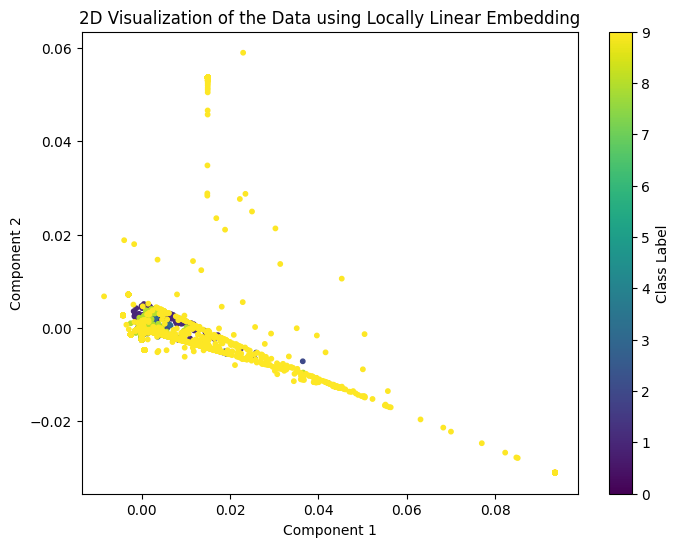

In [10]:
# Assuming coc.y contains class labels (like 'AnnualCrop', 'SeaLake', etc.)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(coc.y)  # Encode labels to integers

# Transform the data using Locally Linear Embedding (assuming coc.q6() gives 2D data)
transformed_data = coc.q6()

# Visualize the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=y_encoded, cmap='viridis', s=10)
plt.colorbar(label='Class Label')  # Color bar to indicate class labels
plt.title('2D Visualization of the Data using Locally Linear Embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
